In [1]:
import mlrose_hiive as mh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import learning_curve
#np.random.seed(44)

#### Data Prep and Processing

In [2]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])

X = wine.drop('quality',axis=1)
y = wine['quality']

X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
learn_rate_array = [0.001, 0.01, 0.1, 1]
algo = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']
time_array = []
train_acc_array = []
test_acc_array = []
for i in algo:
    for j in learn_rate_array:
        nn_model = mh.NeuralNetwork(hidden_nodes=[5,5], activation='sigmoid', algorithm=i, max_iters=1000,
                                    bias=True, is_classifier=True, learning_rate=j, early_stopping=True,
                                    clip_max=5, max_attempts=100, random_state=3)
        
        print("Algorithm:"+i+" Learning Rate:"+str(j))
        
        start_time = time.perf_counter()
        nn_model.fit(X_train, y_train)
        end_time = time.perf_counter()-start_time
        
        time_array.append([i,j,end_time]) # [algorithm, learning rate, run time]
        
        y_train_pred = nn_model.predict(X_train)
        y_train_acc  = accuracy_score(y_train, y_train_pred)
        train_acc_array.append([i,j,y_train_acc])
        
        y_test_pred = nn_model.predict(X_test)
        y_test_acc  = accuracy_score(y_test, y_test_pred)
        test_acc_array.append([i,j,y_test_acc])

Algorithm:random_hill_climb Learning Rate:0.001
Algorithm:random_hill_climb Learning Rate:0.01
Algorithm:random_hill_climb Learning Rate:0.1
Algorithm:random_hill_climb Learning Rate:1
Algorithm:simulated_annealing Learning Rate:0.001
Algorithm:simulated_annealing Learning Rate:0.01
Algorithm:simulated_annealing Learning Rate:0.1
Algorithm:simulated_annealing Learning Rate:1
Algorithm:genetic_alg Learning Rate:0.001
Algorithm:genetic_alg Learning Rate:0.01
Algorithm:genetic_alg Learning Rate:0.1
Algorithm:genetic_alg Learning Rate:1


In [4]:
def convert(array):
    rhc_array =[]
    sa_array  =[]
    ga_array  =[]
    lr_array  =[]
    for i in array:
        if i[0] == 'random_hill_climb':
            rhc_array.append(i[2])
            lr_array.append(i[1])
        elif i[0] == 'simulated_annealing':
            sa_array.append(i[2])
        elif i[0] == 'genetic_alg':
            ga_array.append(i[2])
    return [rhc_array, sa_array, ga_array, lr_array]

In [8]:
def acc_plot(array, title):
    plt.figure(figsize=(10, 5))
    plt.plot(convert(array)[3], convert(array)[0], label='RHC')
    plt.plot(convert(array)[3], convert(array)[1], label='SA')
    plt.plot(convert(array)[3], convert(array)[2], label='GA')
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.savefig('img/'+title+'.png')
    plt.show()
def time_plot(array, title):
    plt.figure(figsize=(10, 5))
    plt.plot(convert(array)[3], convert(array)[0], label='RHC')
    plt.plot(convert(array)[3], convert(array)[1], label='SA')
    plt.plot(convert(array)[3], convert(array)[2], label='GA')
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Run Time')
    plt.title(title)
    plt.legend()
    plt.savefig('img/'+title+'.png')
    plt.show()
def tt_acc(train_array,test_array,l_array, title):
    plt.figure(figsize=(10, 5))
    plt.plot(l_array, train_array,'o-', label='Train')
    plt.plot(l_array, test_array,'o-', label='Test')
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.savefig('img/'+title+'.png')
    plt.show()

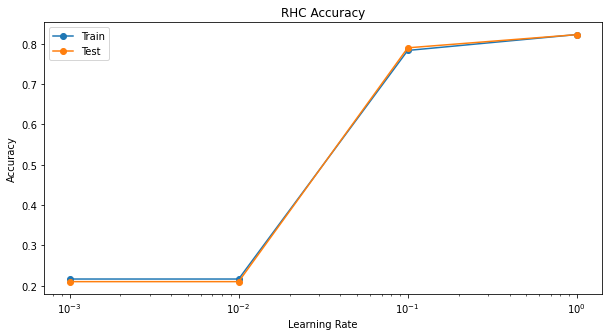

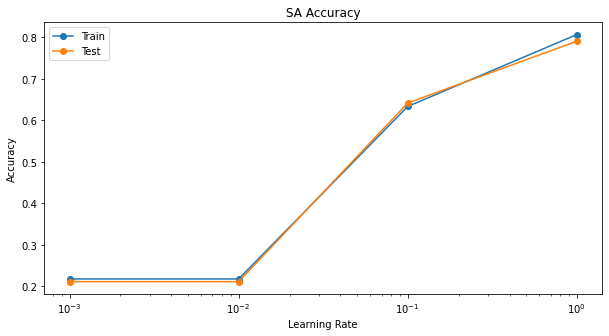

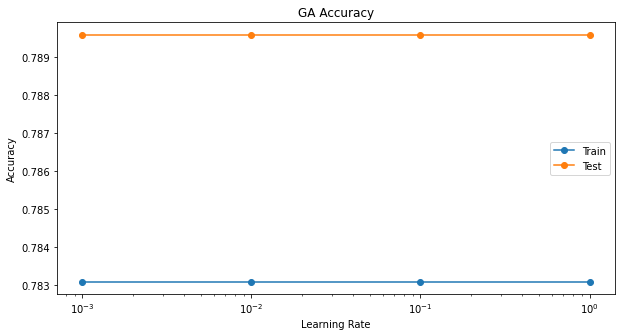

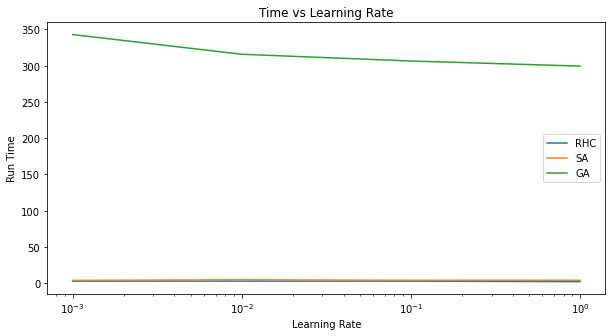

In [9]:
tt_acc(convert(train_acc_array)[0],convert(test_acc_array)[0],convert(train_acc_array)[3],'RHC Accuracy')
tt_acc(convert(train_acc_array)[1],convert(test_acc_array)[1],convert(train_acc_array)[3],'SA Accuracy')
tt_acc(convert(train_acc_array)[2],convert(test_acc_array)[2],convert(train_acc_array)[3],'GA Accuracy')
time_plot(time_array, 'Time vs Learning Rate')